# 스쿨존내어린이 사고다발지역정보
데이터 링크 : https://taas.koroad.or.kr/api/selectSchoolChildDataSet.do

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

plt.rc('font', family='NanumBarunGothic')

pd.set_option('display.max_columns',None)
pd.options.display.float_format = '{:.2f}'.format

In [3]:
cd /content/drive/MyDrive/일일 데이터 분석/

/content/drive/MyDrive/일일 데이터 분석


In [4]:
data = pd.read_csv('./스쿨존내어린이 사고다발지역.csv',encoding='cp949')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   사고다발지FID  391 non-null    int64  
 1   사고다발지ID   391 non-null    int64  
 2   법정동코드     391 non-null    int64  
 3   지점코드      391 non-null    int64  
 4   시도시군구명    391 non-null    object 
 5   지점명       391 non-null    object 
 6   발생건수      391 non-null    int64  
 7   사상자수      391 non-null    int64  
 8   사망자수      391 non-null    int64  
 9   중상자수      391 non-null    int64  
 10  경상자수      391 non-null    int64  
 11  부상신고자수    391 non-null    int64  
 12  경도        391 non-null    float64
 13  위도        391 non-null    float64
 14  다발지역폴리곤   391 non-null    object 
dtypes: float64(2), int64(10), object(3)
memory usage: 45.9+ KB


In [6]:
data.isnull().sum()

사고다발지FID    0
사고다발지ID     0
법정동코드       0
지점코드        0
시도시군구명      0
지점명         0
발생건수        0
사상자수        0
사망자수        0
중상자수        0
경상자수        0
부상신고자수      0
경도          0
위도          0
다발지역폴리곤     0
dtype: int64

In [7]:
data.head()

,사고다발지FID,사고다발지ID,법정동코드,지점코드,시도시군구명,지점명,발생건수,사상자수,사망자수,중상자수,경상자수,부상신고자수,경도,위도,다발지역폴리곤
0,99210,2013060,1111016900,11110001,서울특별시 종로구1,서울특별시 종로구 혜화동(혜화초교 부근),2,2,0,1,1,0,127.00,37.59,"{""type"":""Polygon"",""coordinates"":[[[127.002009,..."
1,99846,2013060,1129013500,11290001,서울특별시 성북구1,서울특별시 성북구 종암동(숭례초교 부근),2,2,0,0,1,1,127.04,37.60,"{""type"":""Polygon"",""coordinates"":[[[127.0381354..."
2,98904,2013060,1129011000,11290002,서울특별시 성북구2,서울특별시 성북구 동소문동7가(정덕초교 부근),2,2,0,2,0,0,127.01,37.60,"{""type"":""Polygon"",""coordinates"":[[[127.0169658..."
3,99206,2013060,1129013900,11290003,서울특별시 성북구3,서울특별시 성북구 석관동(석관초교 부근),3,3,0,2,1,0,127.06,37.61,"{""type"":""Polygon"",""coordinates"":[[[127.0619982..."
4,99209,2013060,1132010500,11320001,서울특별시 도봉구1,서울특별시 도봉구 쌍문동(쌍문초교 부근),2,2,0,0,2,0,127.02,37.65,"{""type"":""Polygon"",""coordinates"":[[[127.0268336..."


In [ ]:
def preprocessing(dataframe):
  df = dataframe.copy()
  code = pd.read_excel('./자전거사고 다발지역 코드.xlsx')

  code_dict = {}
  for i in range(9,19):
    code_dict[code.iloc[i,2]] =  code.iloc[i,1]

  df['년도'] = df['사고다발지ID'].map(lambda x: int('20' + code_dict[x][:2]))

  df['시도'] = df['지점명'].map(lambda x: x.split('(')[0].split(' ')[0])
  df['시군구'] = df['지점명'].map(lambda x: x.split('(')[0].split(' ')[0] + ' ' +  x.split('(')[0].split(' ')[1])
  df['동'] = df['지점명'].map(lambda x: x.split('(')[0].split(' ')[2])

  df = df.drop(['다발지역폴리곤','사고다발지FID','사고다발지ID','법정동코드','지점코드','시도시군구명'],axis=1)

  return df

kids = preprocessing(data)

In [ ]:
kids.head()

,지점명,발생건수,사상자수,사망자수,중상자수,경상자수,부상신고자수,경도,위도,년도,시도,시군구,동
0,서울특별시 종로구 혜화동(혜화초교 부근),2,2,0,1,1,0,127.00,37.59,2012,서울특별시,서울특별시 종로구,혜화동
1,서울특별시 성북구 종암동(숭례초교 부근),2,2,0,0,1,1,127.04,37.60,2012,서울특별시,서울특별시 성북구,종암동
2,서울특별시 성북구 동소문동7가(정덕초교 부근),2,2,0,2,0,0,127.01,37.60,2012,서울특별시,서울특별시 성북구,동소문동7가
3,서울특별시 성북구 석관동(석관초교 부근),3,3,0,2,1,0,127.06,37.61,2012,서울특별시,서울특별시 성북구,석관동
4,서울특별시 도봉구 쌍문동(쌍문초교 부근),2,2,0,0,2,0,127.02,37.65,2012,서울특별시,서울특별시 도봉구,쌍문동


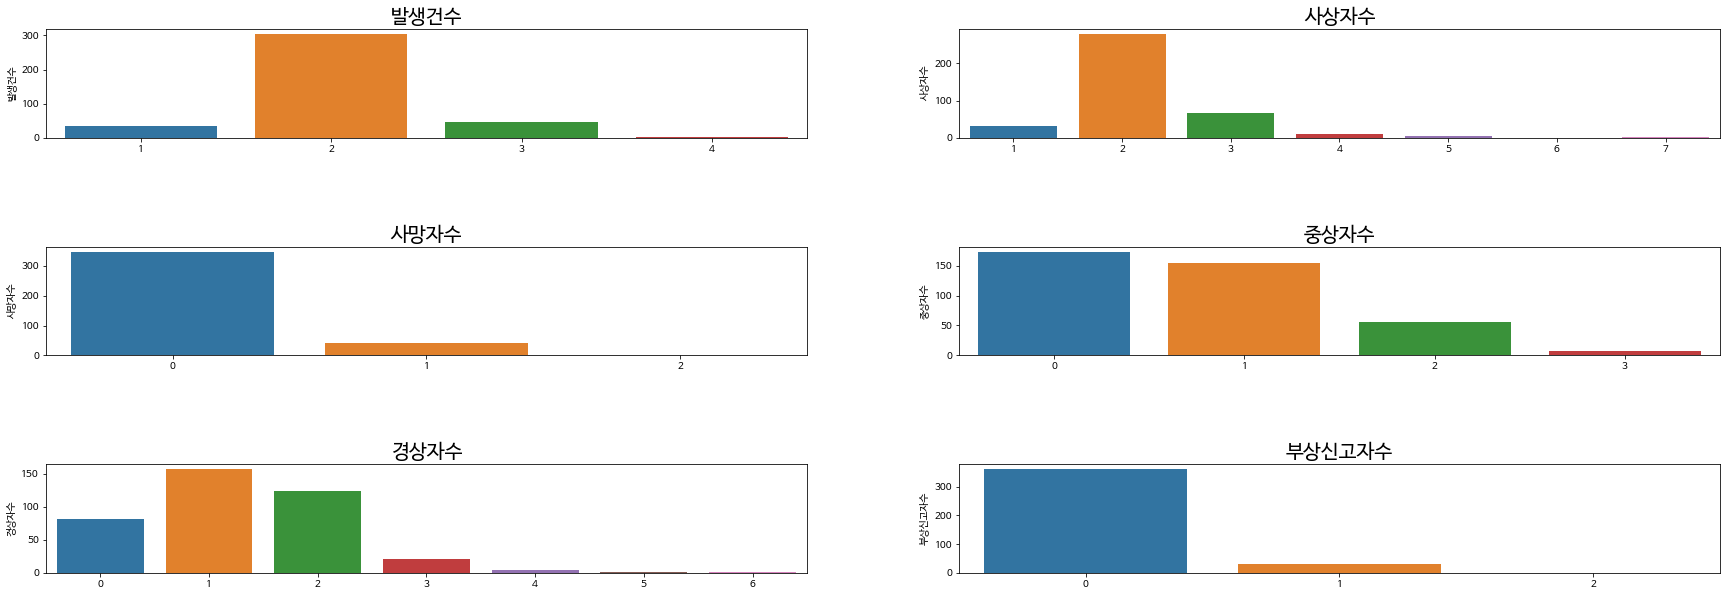

In [ ]:
plt.figure(figsize=(30,10))
plt.subplots_adjust(hspace=1)

for i in range(6):
  plt.subplot(3,2,i+1)
  sns.barplot(x = kids.iloc[:,1+i].value_counts().index , y = kids.iloc[:,1+i].value_counts())
  plt.title(kids.columns[1+i],size=20)
  
plt.show()

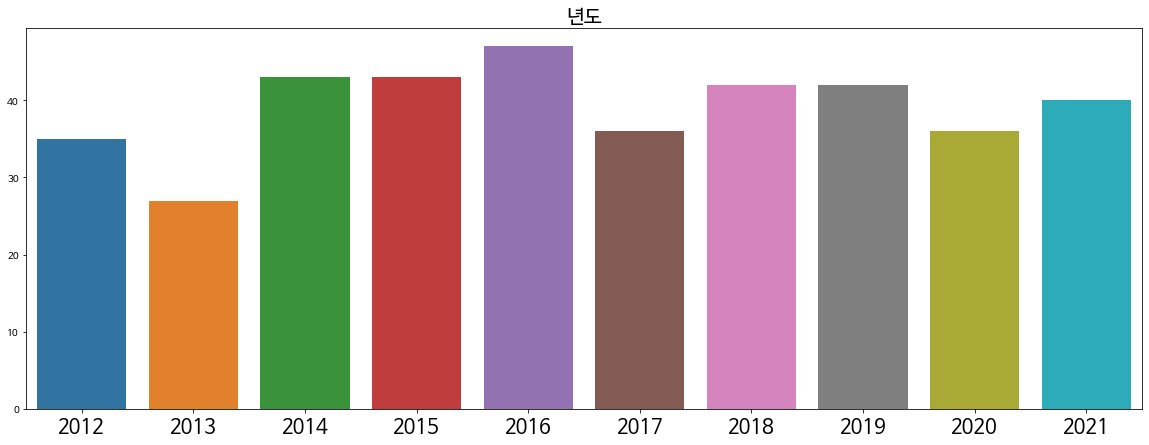

In [ ]:
plt.figure(figsize=(20,7))
plt.subplots_adjust(hspace=1)

sns.countplot(kids['년도'])
plt.title('년도',size=20)
plt.xlabel('')
plt.ylabel('')
plt.xticks(size=20)
plt.show()


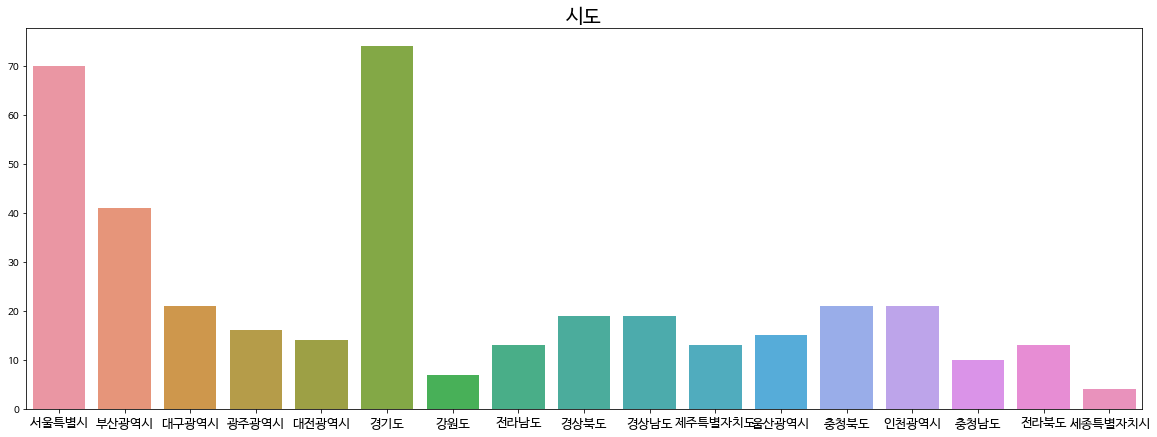

In [ ]:
plt.figure(figsize=(20,7))
plt.subplots_adjust(hspace=1)

sns.countplot(kids['시도'])
plt.title('시도',size=20)
plt.xlabel('')
plt.ylabel('')
plt.xticks(size=13)
plt.show()


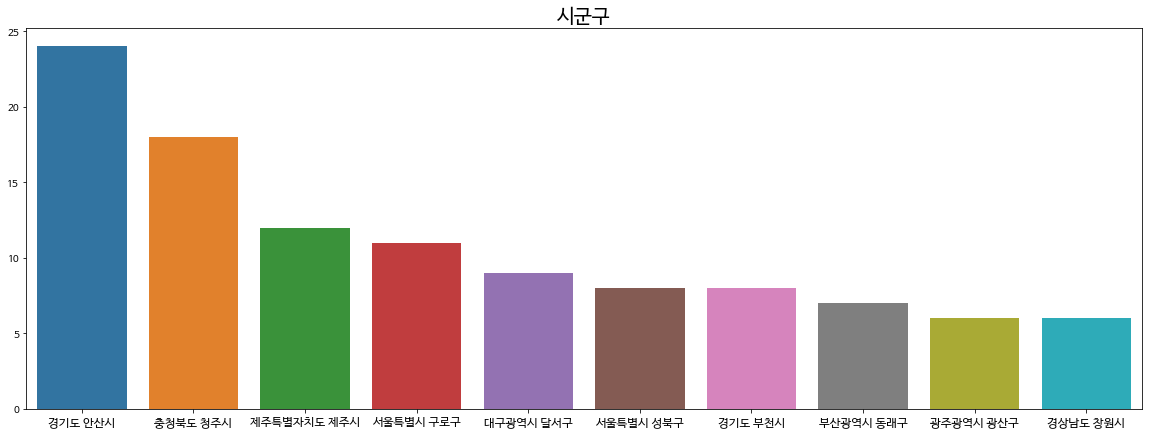

In [ ]:
plt.figure(figsize=(20,7))
plt.subplots_adjust(hspace=1)

sns.barplot(x = kids['시군구'].value_counts().index[:10], y=kids['시군구'].value_counts()[:10])
plt.title('시군구',size=20)
plt.xlabel('')
plt.ylabel('')
plt.xticks(size=12)
plt.show()


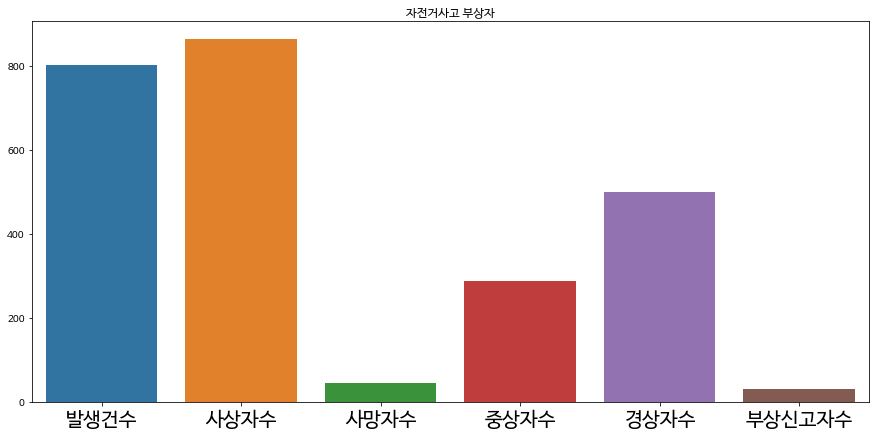

In [ ]:
# 발생건수, 사상자수, 사망자수, 중상자수, 경상자수, 부사

plt.figure(figsize=(15,7))

count_list = []
for i in range(6):
  count_list.append(kids.iloc[:,1+i].sum())

sns.barplot(x = kids.columns[1:7], y = count_list)
plt.title('자전거사고 부상자')
plt.xticks(size=20)
plt.show()

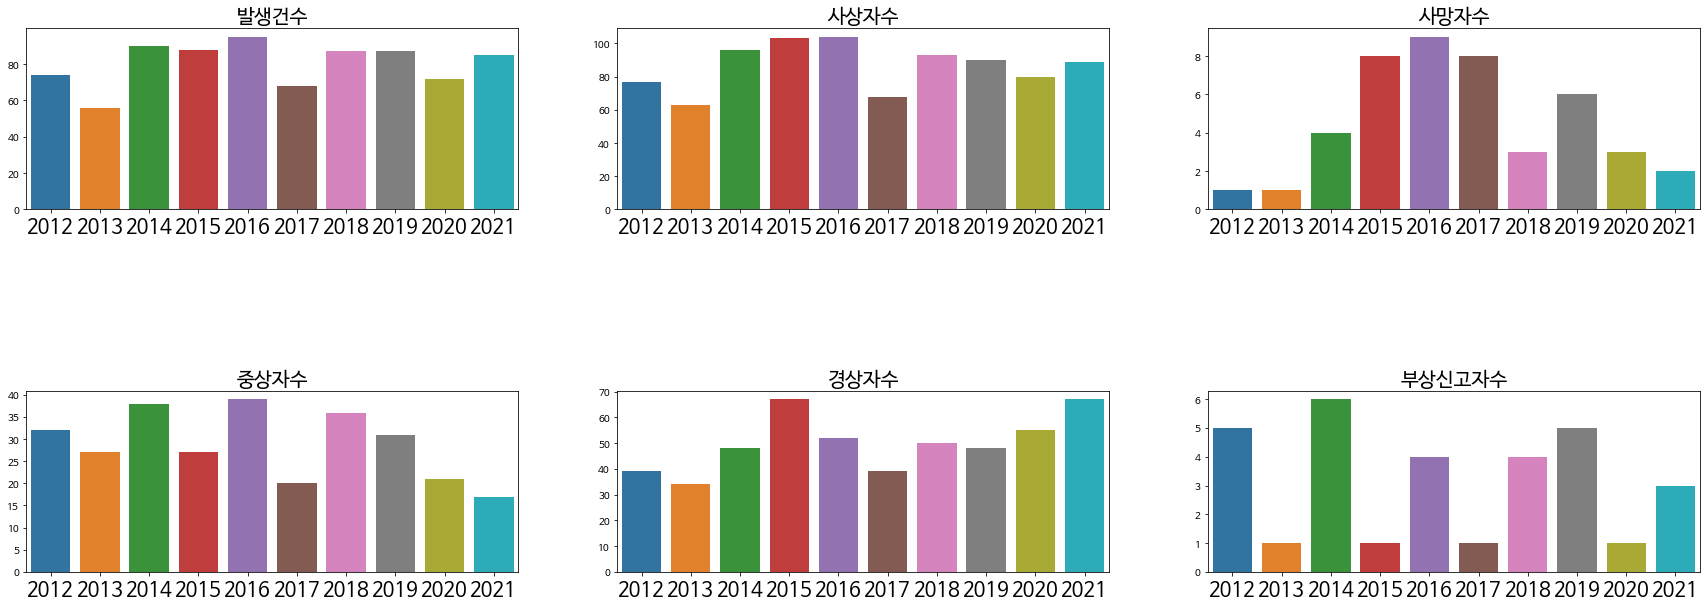

In [ ]:
plt.figure(figsize=(30,10))
plt.subplots_adjust(hspace=1)
year_df = kids.groupby('년도').sum()

for i in range(6):
  plt.subplot(2,3,i+1)
  sns.barplot(x = year_df.index, y= year_df.iloc[:,i])
  plt.title(year_df.columns[i],size=20)
  plt.xlabel('')
  plt.ylabel('')
  plt.xticks(size=20)
plt.show()

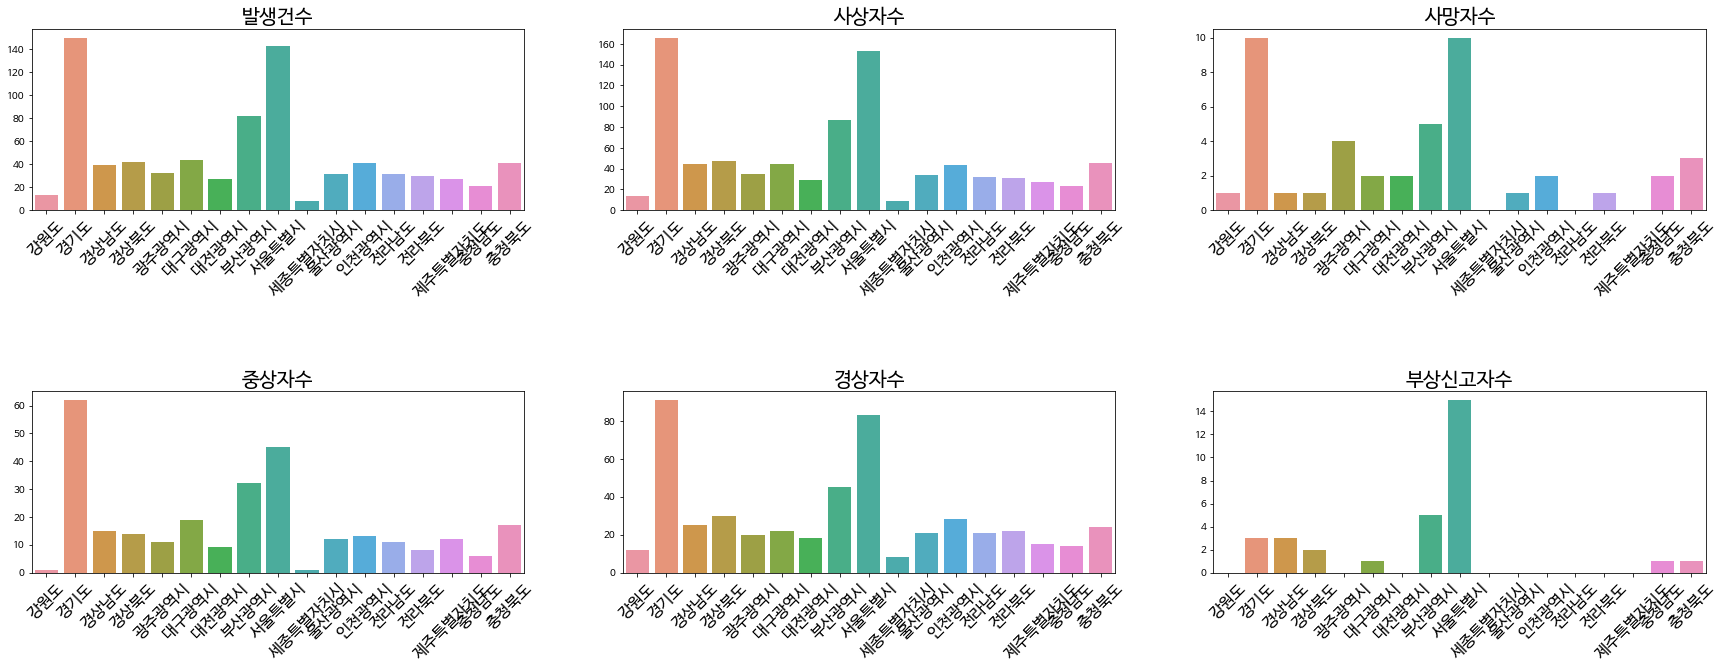

In [ ]:
plt.figure(figsize=(30,10))
plt.subplots_adjust(hspace=1)
year_df = kids.groupby('시도').sum()


for i in range(6):
  plt.subplot(2,3,i+1)
  sns.barplot(x = year_df.index, y= year_df.iloc[:,i])
  plt.title(year_df.columns[i],size=20)
  plt.xlabel('')
  plt.ylabel('')
  plt.xticks(rotation=45,size=16)
plt.show()

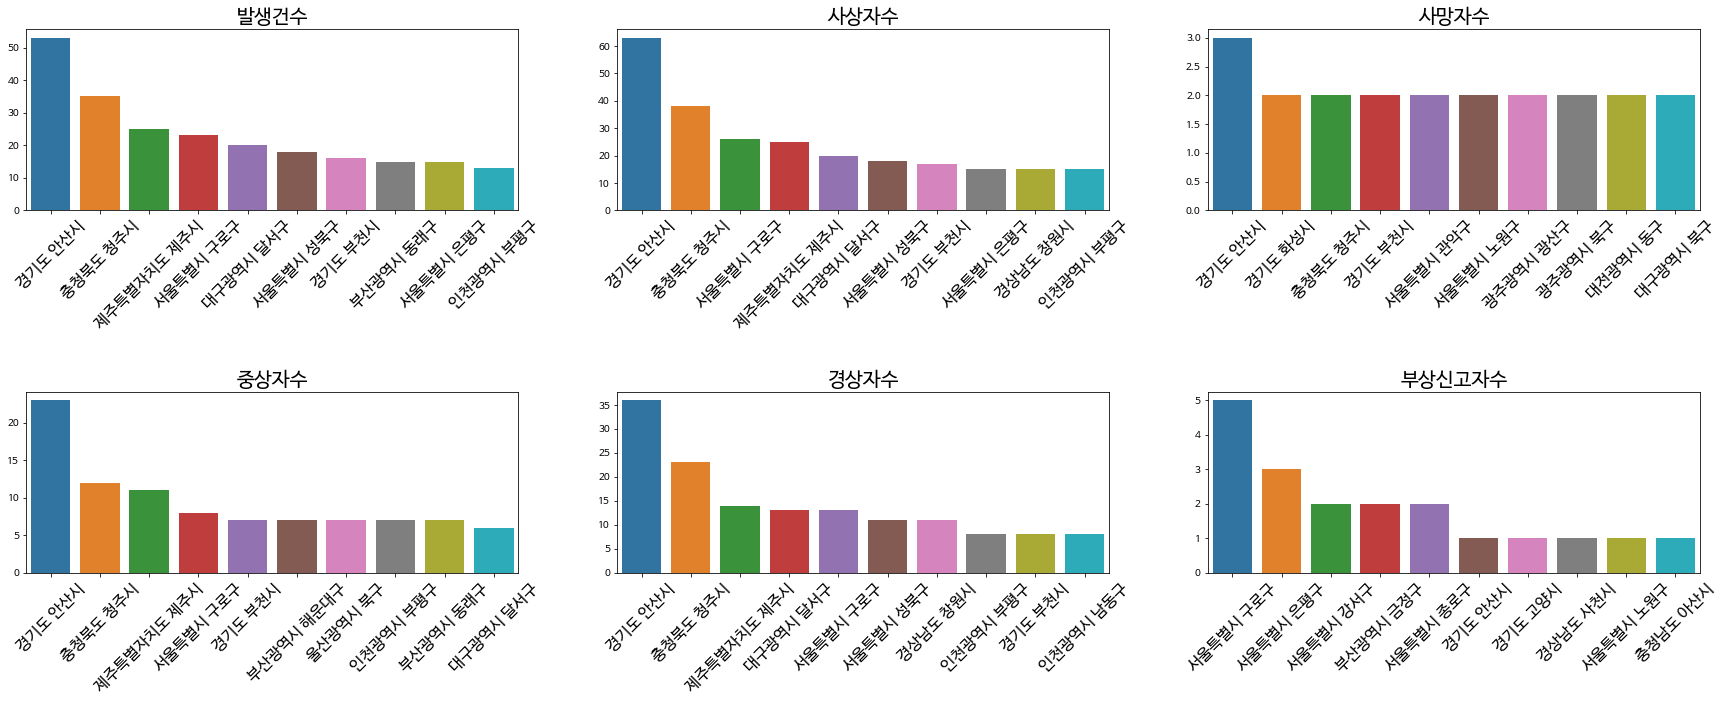

In [ ]:
plt.figure(figsize=(30,10))
plt.subplots_adjust(hspace=1)
year_df = kids.groupby('시군구').sum()

for i in range(6):
  year_df = year_df.sort_values(year_df.columns[i])[::-1]

  plt.subplot(2,3,i+1)
  sns.barplot(x = year_df.index[:10], y= year_df.iloc[:10,i])
  plt.title(year_df.columns[i],size=20)
  plt.xlabel('')
  plt.ylabel('')
  plt.xticks(rotation=45,size=16)
plt.show()

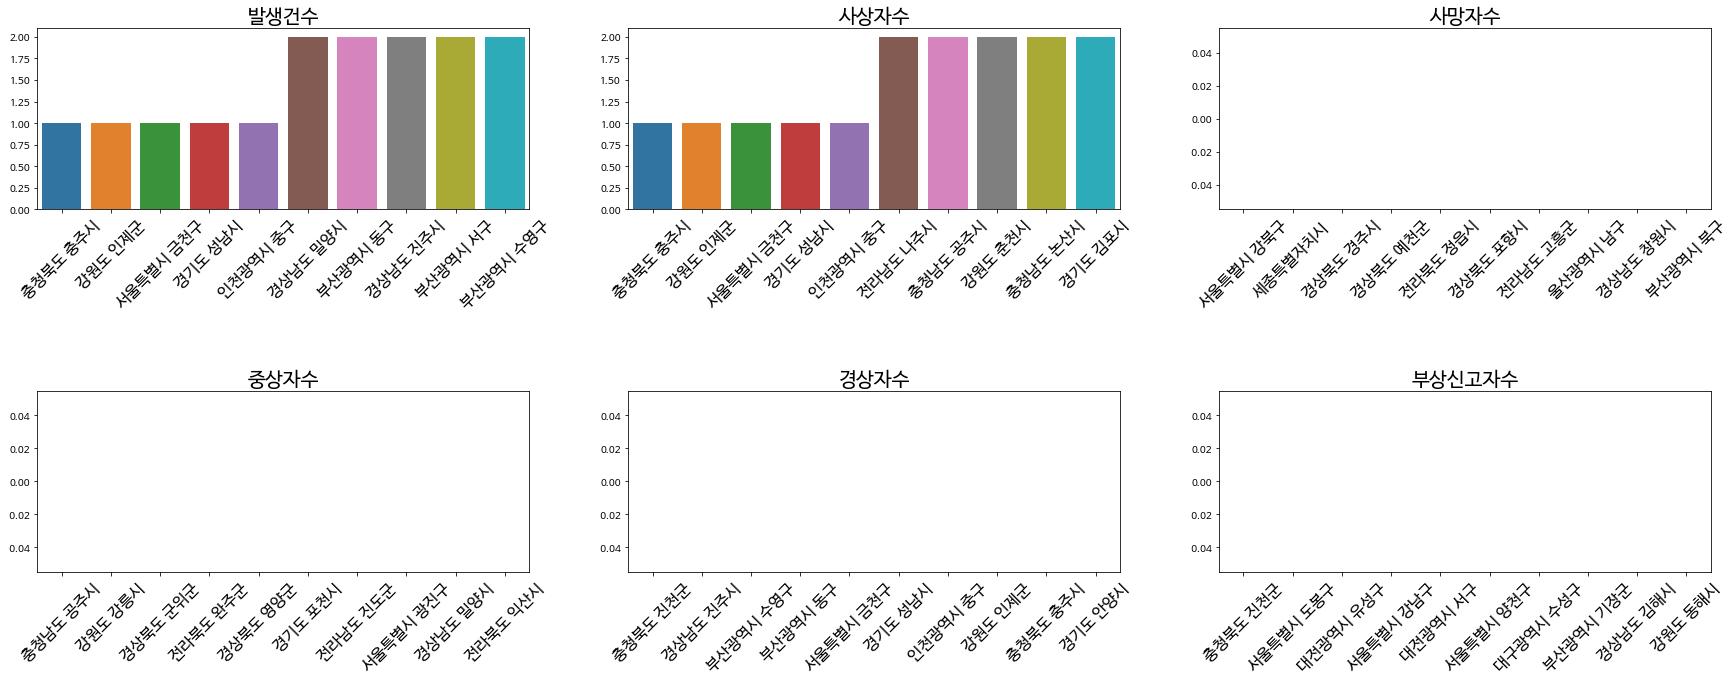

In [ ]:
plt.figure(figsize=(30,10))
plt.subplots_adjust(hspace=1)
year_df = kids.groupby('시군구').sum()

for i in range(6):
  year_df = year_df.sort_values(year_df.columns[i])

  plt.subplot(2,3,i+1)
  sns.barplot(x = year_df.index[:10], y= year_df.iloc[:10,i])
  plt.title(year_df.columns[i],size=20)
  plt.xlabel('')
  plt.ylabel('')
  plt.xticks(rotation=45,size=16)
plt.show()

In [ ]:
import folium as g

plot_df = kids[(kids['시도'] == '서울특별시') | (kids['시도'] == '경기도')].sort_values('발생건수')[::-1][:100]

center_longitude, center_latitude = plot_df['위도'].mean(), plot_df['경도'].mean()

g_map = g.Map(location=[center_longitude,center_latitude],
              tiles='Stamen Terrain',
              zoom_start=12)

for num, (name,lon, lat) in enumerate(zip(plot_df['지점명'],plot_df['위도'],plot_df['경도'])):
  if num < 11:
    marker = g.Marker([lon,lat],
                      popup = name,
                      icon= g.Icon(color='red')).add_to(g_map)
  else:
    marker = g.Marker([lon,lat],
                      popup = name,
                      icon= g.Icon(color='blue')).add_to(g_map)

In [ ]:
g_map